In [8]:
!pip install opencv-python-headless mediapipe

In [9]:
from google.colab import files
uploaded = files.upload()

# Save uploaded files to disk
for filename in uploaded.keys():
    with open(filename, 'wb') as f:
        f.write(uploaded[filename])

Saving woman_garden.png to woman_garden.png


#Capture Body Images

Pose landmarks detected.


/usr/local/lib/python3.10/dist-packages/google/protobuf/symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '


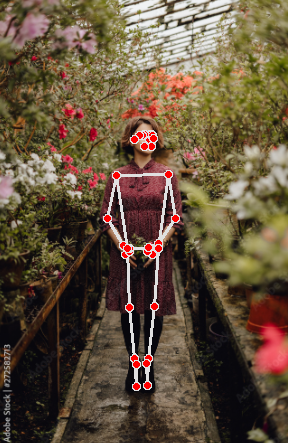

In [10]:
import cv2
import mediapipe as mp

# Initialize MediaPipe pose solution
mp_pose = mp.solutions.pose
pose = mp_pose.Pose()
mp_drawing = mp.solutions.drawing_utils

def process_image(image_path):
    image = cv2.imread(image_path)
    if image is None:
        print(f"Error: Could not read image from {image_path}")
        return

    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    results = pose.process(image_rgb)

    if results.pose_landmarks:
        print("Pose landmarks detected.")
        mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_pose.POSE_CONNECTIONS)
    else:
        print("No pose landmarks detected.")

    # Display the image with landmarks
    _, buffer = cv2.imencode('.png', image)
    from IPython.display import Image, display
    display(Image(data=buffer))

# Process the uploaded images
for filename in uploaded.keys():
    process_image(filename)


#Landmark coordinates

In [11]:
import numpy as np

def extract_landmarks(image_path):
    image = cv2.imread(image_path)
    if image is None:
        print(f"Error: Could not read image from {image_path}")
        return None

    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    results = pose.process(image_rgb)

    if results.pose_landmarks:
        landmarks = []
        for lm in results.pose_landmarks.landmark:
            landmarks.append([lm.x, lm.y, lm.z])
        return np.array(landmarks)
    return None

# Extract landmarks from the uploaded images
for filename in uploaded.keys():
    landmarks = extract_landmarks(filename)
    print(f"Landmarks for {filename}:")
    print(landmarks)


Landmarks for woman_garden.png:
[[ 0.51731914  0.31703448 -0.60061669]
 [ 0.52111065  0.30542982 -0.58011138]
 [ 0.52566659  0.30564985 -0.58002341]
 [ 0.5310716   0.30587924 -0.58002543]
 [ 0.50202781  0.30561373 -0.58406198]
 [ 0.49316108  0.30615705 -0.58420366]
 [ 0.48455918  0.30682728 -0.58425546]
 [ 0.53435248  0.31297612 -0.41998076]
 [ 0.46547964  0.31545889 -0.4399811 ]
 [ 0.52582181  0.33206666 -0.53751379]
 [ 0.50072789  0.33128232 -0.54324353]
 [ 0.58702016  0.39252082 -0.30109259]
 [ 0.40538791  0.39666462 -0.31386551]
 [ 0.60933846  0.48813656 -0.21819155]
 [ 0.37489712  0.49254239 -0.23521572]
 [ 0.55404443  0.54890263 -0.3166962 ]
 [ 0.42939946  0.55585372 -0.30828682]
 [ 0.53728747  0.57364595 -0.35135132]
 [ 0.43938705  0.57727945 -0.34365445]
 [ 0.52222419  0.56600285 -0.37995315]
 [ 0.45316336  0.5704568  -0.36539844]
 [ 0.52311385  0.55815279 -0.32597345]
 [ 0.45246738  0.56242418 -0.31579602]
 [ 0.5523017   0.56053406 -0.00674499]
 [ 0.44265425  0.5614081   0.006